# Import Library & Read CSV & Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# First replace the id with the PassengerId 
gender_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv', index_col= ['PassengerId'])

# Load the train, test, gender_submission file to dataframes
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', index_col= ['PassengerId'])
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv',  index_col= ['PassengerId'])
gender_submission  # This is sample that all woman are survied, and all man are unsurvived

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
train.head(15) #Training Data (Pclass => Ticket Class; SibSp => Siblings, Spouses; Parch => Parents, Children; Embarked => Port)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [ ]:
test #Data without Survived Column

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
desc = train.describe()
desc.loc['count'] = desc.loc['count'].astype(int) #let type(count) = int
desc.iloc[1:] = desc.iloc[1:].applymap('{:.2f}'.format) # set float to the second digit after the decimal point
desc #There are only 38% people survived

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891,891,714,891,891,891
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [ ]:
unique, count= np.unique(train["Survived"], return_counts=True) # Results: unique = [0, 1], count = [549, 342]
print("Died : %s, Survived : %s " % (count[0], count[1]))
print("Total Passengers in Training : %s, All kinds of features : %s" % (train.shape[0], train.shape[1]))
train_na = train.isna().sum() # Check whether row data in train have a null value or not
train_na[lambda x: x != 0] # Missing info in some Training data, so we're gonna predict the info.

Died : 549, Survived : 342 
Total Passengers in Training : 891, All kinds of features : 11


Age         177
Cabin       687
Embarked      2
dtype: int64

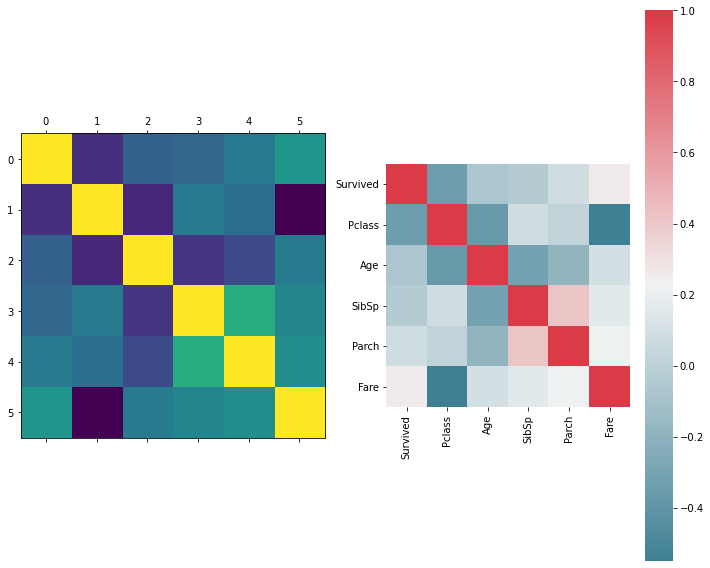

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
f, ax = plt.subplots(1,2,figsize=(10, 8))
# Using matplotlib library
ax[0].matshow(train.corr())

# Using seaborn library
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax[1])

plt.tight_layout()
plt.show()
# We can see that there is a negative correlation between Pclass & fare 
train.corr()

# Data Cleaning
- Name : Extract name, only keep title
- Age, Cabin, Embarked have **nan value** in rows, so we need to set values for them.




## Data Cleaning : Name

In [ ]:
train['Extract_name'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
most_frequency = list(train['Extract_name'].value_counts()[:5].index) # Top 5 most frequency Title, we called others "Others"
print(most_frequency)
train.loc[~train["Extract_name"].isin(most_frequency), 'Extract_name'] = 'Others'
train.loc[:,['Name','Extract_name']] # Now we could use more concise way to present Name

['Mr', 'Miss', 'Mrs', 'Master', 'Dr']


,Name,Extract_name
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
...,...,...
887,"Montvila, Rev. Juozas",Others
888,"Graham, Miss. Margaret Edith",Miss
889,"Johnston, Miss. Catherine Helen ""Carrie""",Miss


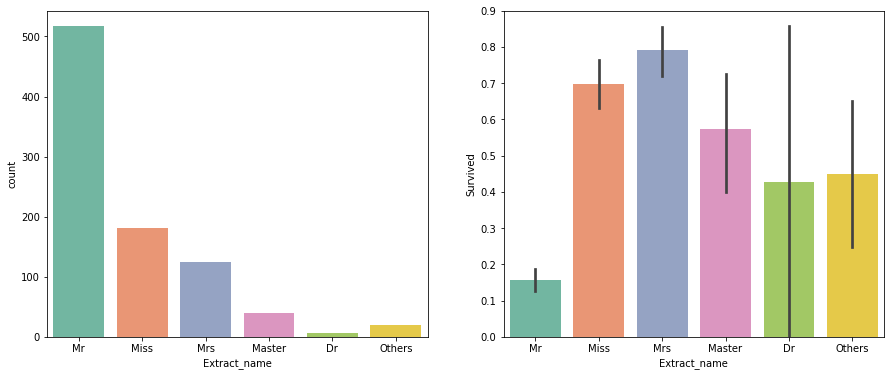

In [ ]:
# Show that number of individual names & survived rates
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot( x='Extract_name', data=train, palette='Set2', ax = ax[0], order = ['Mr','Miss','Mrs','Master','Dr','Others'])
sns.barplot( x='Extract_name', y='Survived', data=train, palette='Set2', ax = ax[1], order = ['Mr','Miss','Mrs','Master','Dr','Others'])
train['Extract_name'] = train['Extract_name'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Others': 5})

## Data Cleaning : Age

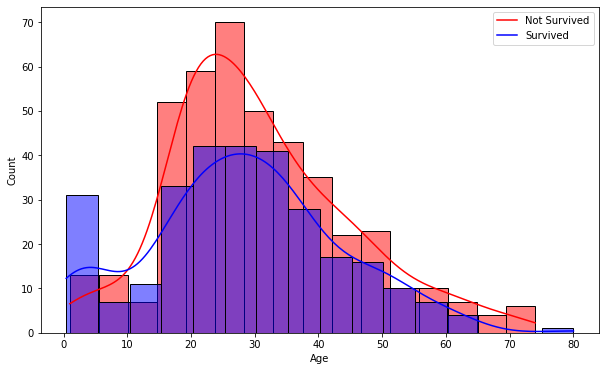

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
sns.histplot(train['Age'][(train['Age'].notnull())&(train['Survived']==0)] , kde=True, color='r', ax=axes )
sns.histplot(train['Age'][(train['Age'].notnull())&(train['Survived']==1)] , kde=True, color='b', ax=axes )
plt.legend(['Not Survived', 'Survived'])# People between 20 and 40 are at high risk of death

In [ ]:
# Previously we saw that we had 177 rows of Age are null, so we give the mean value of Age to them
def Age_classify(age):
  return int(age // 10)
train['Age'].fillna(value = train['Age'].mean(),inplace = True) # Set the null value to  Age's mean value
train['Age'].isna().sum() # Everyone has Age right now!
train['Age'] = train['Age'].apply(Age_classify)

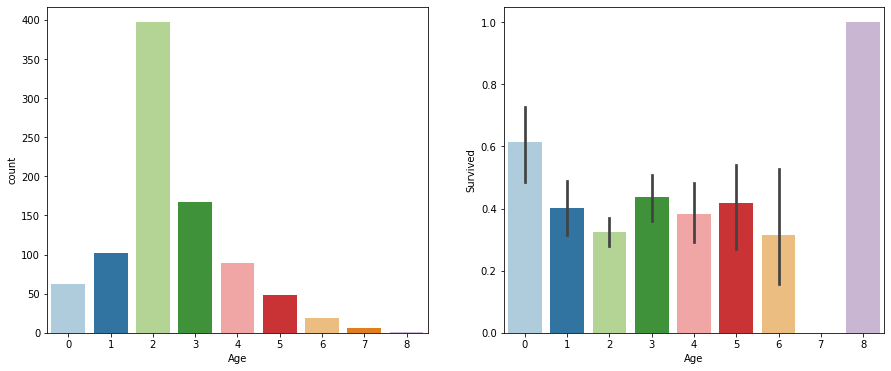

In [ ]:
# Show that number of individual Age's classes & survived rates
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot( x='Age', data=train, palette='Paired', ax = ax[0])
sns.barplot( x='Age', y='Survived', data=train, palette='Paired', ax = ax[1])

## Data Cleaning : Cabin

In [ ]:
train['Cabin'].value_counts() # Only keep letter
def Keep_letter(letter):
  if type(letter) == float: return 'N' # This is nan condition
  else:
    return letter[0]
train['Cabin'] = train['Cabin'].apply(Keep_letter)

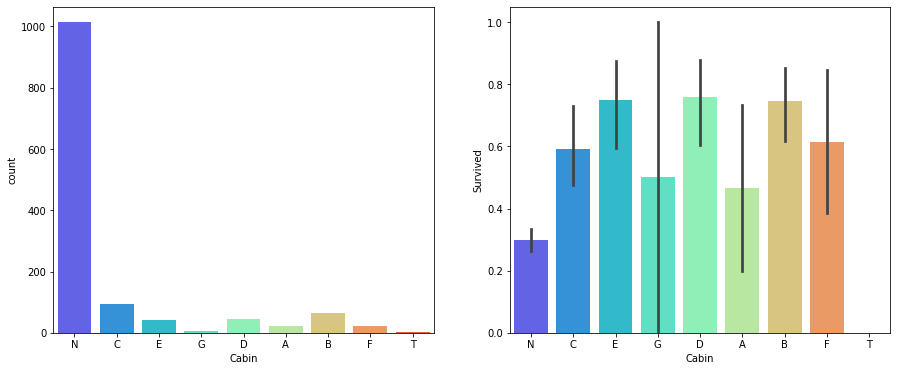

In [ ]:
df = pd.concat([train['Cabin'], test['Cabin']])
df = df.apply(Keep_letter)
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot( x=df, data=train, palette='rainbow', ax = ax[0])
sns.barplot( x=df, y='Survived', data=train, palette='rainbow', ax = ax[1])
# The result shows that we could split Cabin to five pieces 

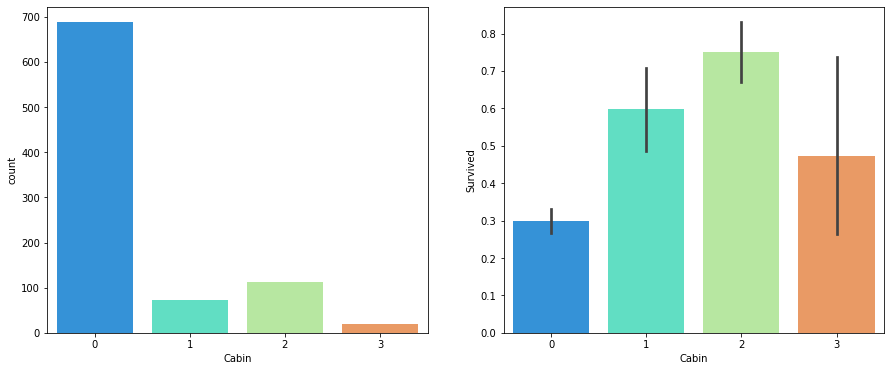

In [ ]:
# Show that number of individual Cabin's classes & survived rates
train['Cabin'] = train['Cabin'].map({'N': 0, 'T': 0, 'C': 1, 'F': 1, 'E': 2, 'D': 2, 'B': 2, 'G': 3, 'A': 3})
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot( x='Cabin', data=train, palette='rainbow', ax = ax[0])
sns.barplot( x='Cabin', y='Survived', data=train, palette='rainbow', ax = ax[1]) # Simplify the problem to Five kinds in the Cabin 

## Data Cleaning : Embarked

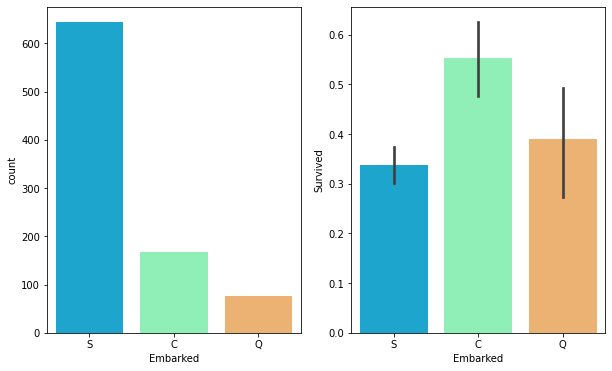

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.countplot(x='Embarked', data=train, palette='rainbow', ax = ax[0]) # To see which port has the most people embarked
sns.barplot( x='Embarked', y='Survived', data=train, palette='rainbow', ax = ax[1])
train['Embarked'] = train['Embarked'].map({"S": 0,"C": 1,"Q": 2})
train['Embarked'].fillna(value = 0, inplace = True) # Set the null value to  0 (Common port)

## Data cleaning : Fare

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

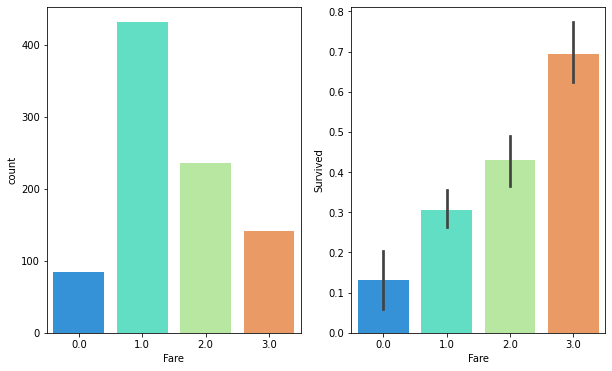

In [ ]:
# We are not sure how to deal with the fare, so we didn't use that
# Processing: 
#   1.Set all value in Fare to the logarithm of themselves
#   2.Split Fare to four classes
train['Fare'].value_counts()
train['Fare'] = np.log(train['Fare'])
for i in train['Fare'].index:
  if train['Fare'][i] < 2 : train['Fare'][i] = 0
  elif train['Fare'][i] < 3 : train['Fare'][i] = 1
  elif train['Fare'][i] < 4 : train['Fare'][i] = 2
  else: train['Fare'][i] = 3
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.countplot(x='Fare', data=train, palette='rainbow', ax = ax[0])
sns.barplot( x='Fare', y='Survived', data=train, palette='rainbow', ax = ax[1])

## Data cleaning: Sibsp + Parch

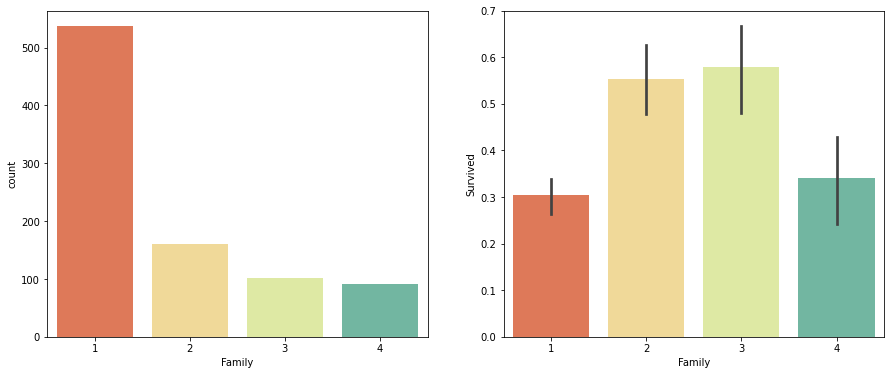

In [ ]:
train['Family'] = train['Parch'] + train['SibSp'] + 1 # Including own self
train.loc[train['Family'] >= 5, 'Family'] = 4
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot( x='Family', data=train, palette='Spectral', ax = ax[0])
sns.barplot( x='Family', y='Survived', data=train, palette='Spectral', ax = ax[1])
# The result shows that we could split Cabin to five pieces 

In [ ]:
# We use one hot vector on Pclass, but its result was not good
# train = train.join(pd.get_dummies(train['Pclass'], prefix='Pclass_')) 
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
Y_train = train[["Survived"]].values
train.drop(['Name', 'Fare','Ticket', 'Survived', 'Parch', 'SibSp'], axis = 1, inplace = True)# Maybe useless(?

X_train = train.values

In [ ]:
# Change type to int
train['Embarked'] = train['Embarked'].astype(int)
train['Cabin'] = train['Cabin'].astype(int)
train

,Pclass,Sex,Age,Cabin,Embarked,Extract_name,Family
PassengerId,,,,,,,
1,3,0,2,0,0,0,2
2,1,1,3,1,1,2,2
3,3,1,2,0,0,1,1
4,1,1,3,1,0,2,2
5,3,0,3,0,0,0,1
...,...,...,...,...,...,...,...
887,2,0,2,0,0,5,1
888,1,1,1,2,0,1,1
889,3,1,2,0,0,1,4


# Data Preprocessing: Test

In [ ]:
# Do the same thing, Data cleaning and Engineer
# Name -> Extract_name
test['Extract_name'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test.loc[~test["Extract_name"].isin(most_frequency), 'Extract_name'] = 'Others'
test.loc[:,['Name','Extract_name']] # Now we could use more concise way to present Name
test['Extract_name'] = test['Extract_name'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Others': 5})
# Age
test['Age'].fillna(value = test['Age'].mean(),inplace = True)
test['Age'] = test['Age'].apply(Age_classify)
# Cabin
test['Cabin'] = test['Cabin'].apply(Keep_letter)
test['Cabin'] = test['Cabin'].map({'N': 0, 'T': 0, 'C': 1, 'F': 1, 'E': 2, 'D': 2, 'B': 2, 'G': 3, 'A': 3})
# Embarked
test['Embarked'] = test['Embarked'].map({"S": 0,"C": 1,"Q": 2})
test['Embarked'].fillna(value = 0, inplace = True)

#test = test.join(pd.get_dummies(test['Pclass'], prefix='Pclass_'))
# Sex
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
# Sibsp, Parch -> Family
test['Family'] = test['Parch'] + test['SibSp'] + 1 # Including own self
test.loc[test['Family'] >= 5, 'Family'] = 4
# Fare
# test['Fare'] = np.log(test['Fare'])
# for i in test['Fare'].index:
#   if test['Fare'][i] < 2 : test['Fare'][i] = 0
#   elif test['Fare'][i] < 3 : test['Fare'][i] = 1
#   elif test['Fare'][i] < 4 : test['Fare'][i] = 2
#   else: test['Fare'][i] = 3

test.drop(['Name','Fare','Ticket', 'Parch', 'SibSp'], axis = 1, inplace = True)# Maybe useless(?
X_test = test.values

test['Embarked'] = test['Embarked'].astype(int)
test['Cabin'] = test['Cabin'].astype(int)

X_test = preprocessing.scale(X_test)
X_test.shape
test.isna().sum()

Pclass          0
Sex             0
Age             0
Cabin           0
Embarked        0
Extract_name    0
Family          0
dtype: int64

# Model Training

[[ 0.82737724 -0.73769513 -0.31048834 ... -0.56883712 -0.67618558
   0.2777598 ]
 [-1.56610693  1.35557354  0.42723196 ...  1.00518113  1.09581839
   0.2777598 ]
 [ 0.82737724  1.35557354 -0.31048834 ... -0.56883712  0.20981641
  -0.70043777]
 ...
 [ 0.82737724  1.35557354 -0.31048834 ... -0.56883712  0.20981641
   2.23415495]
 [-1.56610693 -0.73769513 -0.31048834 ...  1.00518113 -0.67618558
  -0.70043777]
 [ 0.82737724 -0.73769513  0.42723196 ...  2.57919938 -0.67618558
  -0.70043777]]
Epoch 1/50
75/75 [==============================] - 1s 5ms/step - loss: 0.6413 - accuracy: 0.6812 - val_loss: 0.5760 - val_accuracy: 0.7458
Epoch 2/50
75/75 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.7634 - val_loss: 0.4907 - val_accuracy: 0.7695
Epoch 3/50
75/75 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7785 - val_loss: 0.4557 - val_accuracy: 0.7864
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 0.4593 - accurac

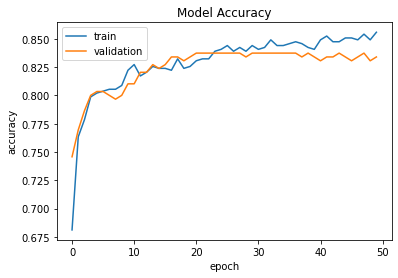

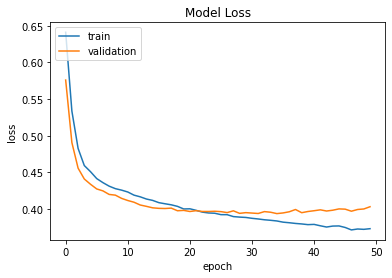

In [ ]:
# Use keras.models.Sequential()
# Build, compile and fit the model
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 

# Standardize data for MLP
from sklearn import preprocessing

# Fixed the result
tf.random.set_seed(69)

X_train = preprocessing.scale(X_train)
print(X_train)

# Try and Error!
model = Sequential()
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
#model.add(Dropout(0.1))
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.1))
#model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
# Hyperparameter 
epochs = 50
#lr = 0.01
#decay = lr / epochs
#momentum = 0.8

# Preset of Opt is better than we tried
#opt = optimizers.Adam(lr = 0.001,decay = 0, beta_1=0.9, beta_2=0.999, epsilon = None, amsgrad = True)
#opt = optimizers.SGD(lr=lr, decay=decay, momentum=momentum, nesterov=False)

# training
model.compile(loss = "binary_crossentropy", optimizer = 'Adam', metrics = ["accuracy"])

# track model performance, we also tried earlystop and checkpoint
stop = EarlyStopping(monitor = 'val_loss', patience = epochs, verbose = 1)
filePath = '/content/drive/MyDrive/Colab Notebooks/tmp/weights.hdf5'
checkpointer = ModelCheckpoint(filepath= filePath, monitor = "val_loss", mode = 'min',verbose=1, save_best_only=True)

history = model.fit(X_train, Y_train, epochs = epochs, validation_split = 0.33, shuffle = True, 
        verbose = 1, batch_size = 8)
Loss, Accurancy = model.evaluate(X_train, Y_train)  
print("Loss: {0}, Accurancy: {1}".format(Loss, Accurancy)) # Performance 
#model.load_weights(checkpointer)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Data Prediction

In [ ]:
# Sigmoid activation gives probabilities of 1 (Survived) 
# Binarizer turns this into appropiate output for competition guidelines
predictions = model.predict(X_test, batch_size=8)
print(X_test)
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.5)
predictions = binarizer.fit_transform(predictions)
predictions = predictions.astype(int)                       

# Create submission file
PassengerId = test.index
evaluation = PassengerId.to_frame()
evaluation["Survived"] = predictions
evaluation.to_csv("evaluation_submission.csv", index = False)

[[ 0.87348191 -0.75592895  0.24717048 ...  2.24316522 -0.71398966
  -0.70326231]
 [ 0.87348191  1.32287566  1.023992   ... -0.6778412   1.15715565
   0.31040543]
 [-0.31581919 -0.75592895  2.57763504 ...  2.24316522 -0.71398966
  -0.70326231]
 ...
 [ 0.87348191 -0.75592895  0.24717048 ... -0.6778412  -0.71398966
  -0.70326231]
 [ 0.87348191 -0.75592895  0.24717048 ... -0.6778412  -0.71398966
  -0.70326231]
 [ 0.87348191 -0.75592895  0.24717048 ...  0.78266201  2.09272831
   1.32407317]]
